In [171]:
import pandas as pd
df = pd.read_csv("../data_df.csv")
df


,abbreviation,full_length,count_abbr,count_fl,abbr_mask_l2r_avg_per_token,abbr_seq_avg_per_token,abbr_mask_l2r_surprisal_mean,abbr_sequential_surprisal_mean,fl_mask_l2r_avg_per_token,fl_seq_avg_per_token,fl_mask_l2r_surprisal_mean,fl_sequential_surprisal_mean
0,idk,i don't know,181,200,36.111820,36.111820,36.111820,36.111820,29.682890,30.548731,118.731560,122.194923
1,rn,right now,94,563,34.430767,34.430767,34.430767,34.430767,31.020739,31.184992,62.041477,62.369984
2,omg,oh my god,465,54,37.170624,37.170624,37.170624,37.170624,33.246212,34.546528,99.738632,103.639587
3,idc,i don't care,59,61,37.982258,37.982258,37.982258,37.982258,30.028427,31.080845,120.113708,124.323380
4,lol,laugh out loud,2127,2,27.826387,27.826387,27.826387,27.826387,33.956551,36.563072,101.869652,109.689217
5,bro,brother,391,775,28.696964,28.696964,28.696964,28.696964,27.165779,27.165779,27.165779,27.165779
6,dm,direct message,258,2,35.857975,35.857975,35.857975,35.857975,42.211414,42.900341,84.422829,85.800682
7,wtf,what the fuck,205,64,36.425354,36.425354,36.425354,36.425354,27.987272,29.135048,83.961823,87.405144
8,lmao,laughing my ass off,436,2,31.736372,31.736372,31.736372,31.736372,33.683586,34.578491,134.734344,138.313965
9,sry,sorry,5,601,40.930473,40.930473,40.930473,40.930473,30.370813,30.370813,30.370813,30.370813


In [172]:

df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])


In [173]:

print("means sequential: ", df["abbr_sequential_surprisal_mean"].mean(), df["fl_sequential_surprisal_mean"].mean())
print("means mask l2r: ", df["abbr_mask_l2r_surprisal_mean"].mean(), df["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df["count_abbr"].mean(), df["count_fl"].mean())

means sequential:  34.882590449999995 72.62858877568793
means mask l2r:  34.882590449999995 70.51947100712572
counts:  397.25 2425.05


In [174]:
df_subset = df[df['full_length'].str.contains(" ")]
df_subset = df_subset[df_subset["count_abbr"]>0]
df_subset = df_subset[df_subset["count_fl"]>0]
print(df_subset["abbreviation"])

print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df_subset["abbr_mask_l2r_surprisal_mean"].mean(), df_subset["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df_subset["count_abbr"].mean(), df_subset["count_fl"].mean())

0      idk
1       rn
2      omg
3      idc
4      lol
6       dm
7      wtf
8     lmao
13    rofl
14     lmk
15     ily
16    yolo
18     ikr
19     ofc
23     tbh
24     tbt
25     smh
28     imo
29      ic
30      ht
31     ftw
33     ema
36     btw
37      br
Name: abbreviation, dtype: object
means sequential:  35.07001579166667 97.56723419825236
means mask all:  35.07001579166667 94.13991782433875
counts:  201.08333333333334 105.33333333333333


In [175]:
df_subset = df[~df['full_length'].str.contains(" ")]
print(df_subset["abbreviation"])

df_subset = df_subset[df_subset["count_abbr"]>0]
df_subset = df_subset[df_subset["count_fl"]>0]
print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df_subset["abbr_mask_l2r_surprisal_mean"].mean(), df_subset["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df_subset["count_abbr"].mean(), df_subset["count_fl"].mean())

5       bro
9       sry
10        v
11        w
12      nvm
20        u
21        r
22      abt
26       rt
27       kk
32      fab
34    deets
35      cld
38       b4
39       bc
Name: abbreviation, dtype: object
means sequential:  34.851814866666665 32.72675609958484
means mask all:  34.851814866666665 32.72675609958484
counts:  729.8666666666667 6298.266666666666


In [176]:
print("per token averages: ", df["fl_seq_avg_per_token"].mean(), df["abbr_seq_avg_per_token"].mean())

per token averages:  33.469819439782036 34.882590449999995


In [177]:
# need to do indiv word lengths
import pandas as pd
df = pd.read_csv("../data_df.csv")

df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
new_df = pd.DataFrame()
fl_len =  df["fl_len"]
abbr_len = df["abbr_len"]
len = pd.concat([fl_len, abbr_len], ignore_index=True)
counts = pd.concat([df["count_fl"], df["count_abbr"]], ignore_index=True)
surprisal_seq = pd.concat([df["fl_sequential_surprisal_mean"], df["abbr_sequential_surprisal_mean"]], ignore_index=True)
surprisal_mask_l2r = pd.concat([df["fl_mask_l2r_surprisal_mean"], df["abbr_mask_l2r_surprisal_mean"]], ignore_index=True)
new_df["word_length"] = len
new_df["frequency"] = counts
new_df["surprisal_seq"] = surprisal_seq
new_df["surprisal_mask_l2r"] = surprisal_mask_l2r
new_df

,word_length,frequency,surprisal_seq,surprisal_mask_l2r
0,12,200,122.194923,118.731560
1,9,563,62.369984,62.041477
2,9,54,103.639587,99.738632
3,12,61,124.323380,120.113708
4,14,2,109.689217,101.869652
...,...,...,...,...
75,3,1,31.806023,31.806023
76,3,146,34.698616,34.698616
77,2,36,38.459620,38.459620
78,2,63,37.197506,37.197506


frequency
rsquared, mse:  -0.7762661292049837 6.9200151243173895
pearson corr, pvalue:  -0.47773101630228826 8.501347599453285e-06
spearman corr, pvalue:  -0.375463226837511 0.0006504573244747261
surprisal sequential
rsquared, mse:  0.7946139027262346 2.3530900512682456
pearson corr, pvalue:  0.8990600970020978 2.4119199805217238e-29
spearman corr, pvalue:  0.6343073765619769 3.4712427975390723e-10
surprisal mask all
rsquared, mse:  0.7883727058493464 2.3885749092313215
pearson corr, pvalue:  0.8993140012279627 2.1997234534028e-29
spearman corr, pvalue:  0.6347525305779278 3.3449197441085556e-10


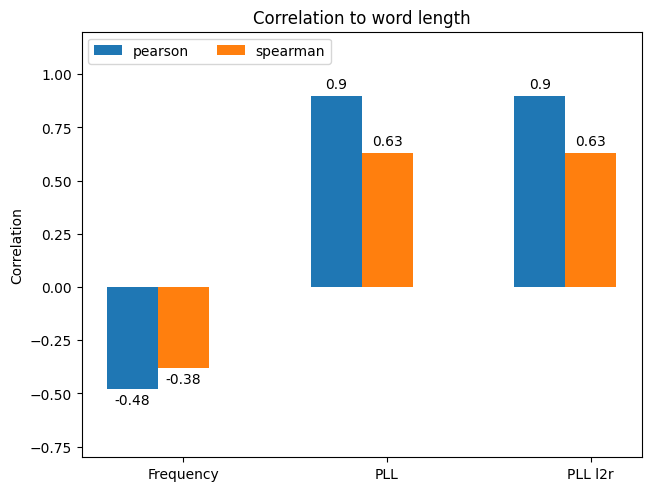

In [178]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df_drop_nan = np.log2(new_df[new_df['frequency'] != 0])
X_freq = df_drop_nan[["frequency"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_seq'].notna()]
X_seq = df_drop_nan[["surprisal_seq"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_mask_l2r'].notna()]
X_mask_l2r = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

y = df_drop_nan["word_length"].to_numpy()
corrs = {"pearson":[], "spearman": []}
weights = np.ones_like(y)
for idx, X in enumerate([X_freq, X_seq, X_mask_l2r]):
    reg = LinearRegression(copy_X=True, fit_intercept=False).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)
    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs["pearson"].append(corr_pearson.round(2))
    corrs["spearman"].append(corr_spearman.round(2))
    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    else:
        print("surprisal mask all")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

import matplotlib.pyplot as plt
import numpy as np

groups = ("Frequency", "PLL", "PLL l2r")


x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to word length')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.8, 1.2)

plt.show()

30.703269995785927 0.3023865859775413 92.86303143510051
-0.5498968866774401 0.00028753210573828316
-0.546761133603239 0.0003164763015688726


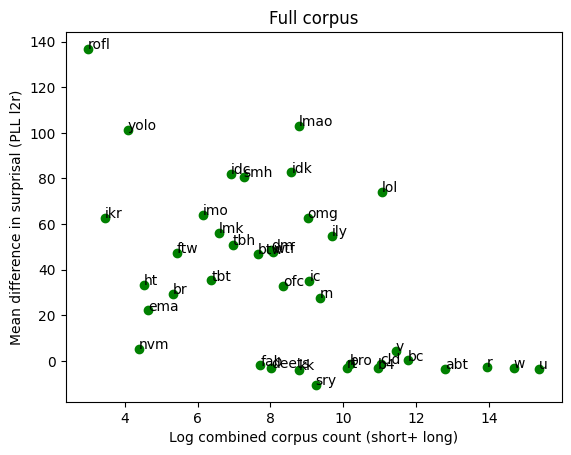

In [179]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]


# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Full corpus")
plt.ylabel("Mean difference in surprisal (PLL l2r)")
# plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

26.951403675787205 0.028787216789839642 74.7817603269979
-0.16966796041044363 0.4280113329489848
-0.04434782608695652 0.8369769840650598


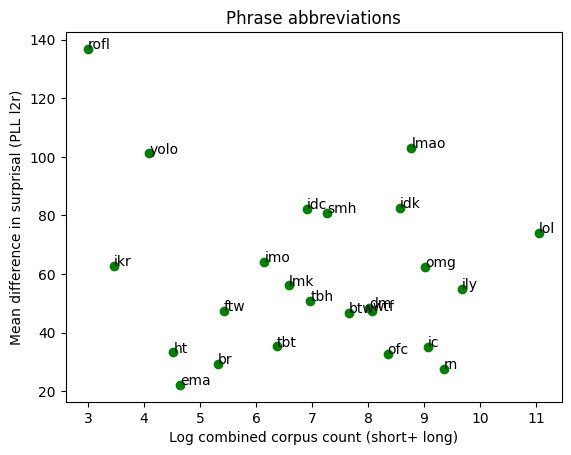

In [180]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_df.csv")
df = df[df['full_length'].str.contains(" ")] # just look at the phrases
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]


# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Phrase abbreviations")
plt.ylabel("Mean difference in surprisal (PLL l2r)")
# plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

3.3980802083353088 0.05674294850627137 1.0705782243836839
-0.2382077843108222 0.3925821005227358
-0.12857142857142856 0.6479163294665075


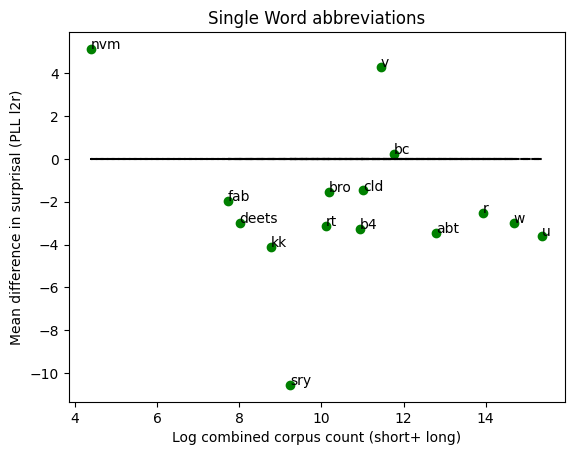

In [181]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_df.csv")
df = df[~df['full_length'].str.contains(" ")] # just look at the single word
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Single Word abbreviations")
plt.ylabel("Mean difference in surprisal (PLL l2r)")
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='black', linestyle="dashed")
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

4.67841701785153 0.04445894085665769 -6.07565113091248
0.21085288913519207 0.3341745762514578
0.2005928853754941 0.3587559053118984


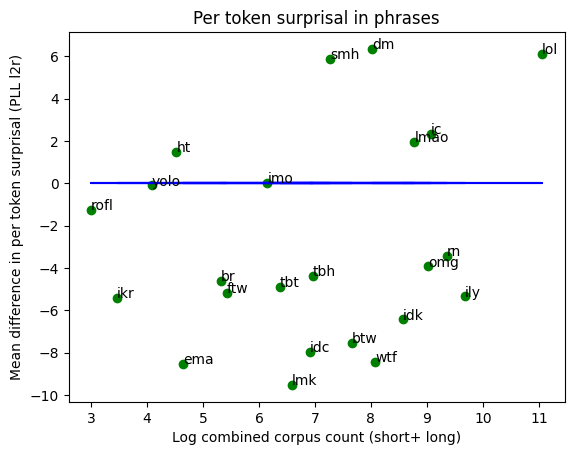

In [182]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_df.csv")
df = df[df['full_length'].str.contains(" ")] # just look at phrases
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_avg_per_token'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_avg_per_token'].notna()]

# drop instances where the token for the abbreviation is <unk>

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_avg_per_token"] - df_drop_nan["abbr_mask_l2r_avg_per_token"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Per token surprisal in phrases")
plt.ylabel("Mean difference in per token surprisal (PLL l2r)")
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

0.10143302766663864 0.31757187967449096 0.6227376507382177


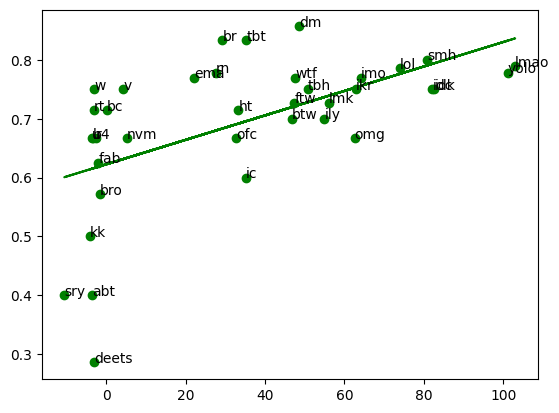

In [183]:
from matplotlib import pyplot as plt
df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] > 1]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] >1]

# drop where any surprisal is NaN, it should be taken care of already
# df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
# df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
# plot for diff in surprisal predicting compression
x_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"]
x_diff_in_surprisal = x_diff_in_surprisal.to_numpy()
x_diff_in_surprisal =  x_diff_in_surprisal[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_surprisal, y_compression, weights)
r_squared = reg.score(x_diff_in_surprisal, y_compression)

y_predict = reg.predict(x_diff_in_surprisal)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_surprisal, y_compression,color='g')
ax.plot(x_diff_in_surprisal, reg.predict(x_diff_in_surprisal),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_surprisal[i], y_compression[i]))

0.12369291826281202 0.11189426175622463 0.8143620204459581


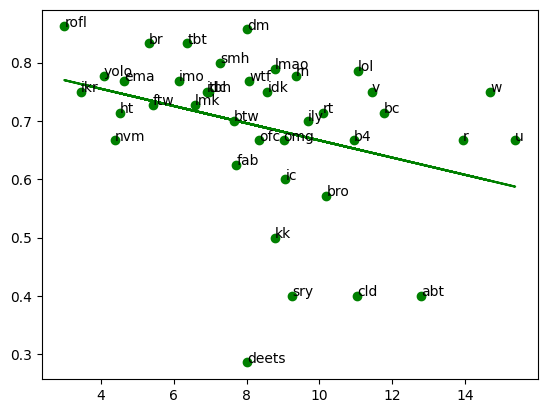

In [184]:

df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# frequency (log of sum) as a predictor for compression
x_diff_in_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_diff_in_freq = np.log2(x_diff_in_freq.to_numpy())
x_diff_in_freq =  x_diff_in_freq[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_freq, y_compression, weights)
r_squared = reg.score(x_diff_in_freq, y_compression)

y_predict = reg.predict(x_diff_in_freq)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_freq, y_compression,color='g')
ax.plot(x_diff_in_freq, reg.predict(x_diff_in_freq),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_freq[i], y_compression[i]))


frequency
rsquared, mse:  0.08828272549183569 0.12532640716505103
pearson corr, pvalue:  0.2971240910660656 0.07
spearman corr, pvalue:  0.11834785844397419 0.47
surprisal sequential
rsquared, mse:  0.35667129891579996 0.10527589963969945
pearson corr, pvalue:  0.5972196404303863 0.0
spearman corr, pvalue:  0.6466464138814868 0.0
surprisal mask all
rsquared, mse:  0.3615637464699717 0.10487482955184857
pearson corr, pvalue:  0.6013017100175017 0.0
spearman corr, pvalue:  0.6720609090033813 0.0
word length
rsquared, mse:  0.37495283639274557 0.10376930120808409
pearson corr, pvalue:  0.6123339255608378 0.0
spearman corr, pvalue:  0.7927148317635639 0.0


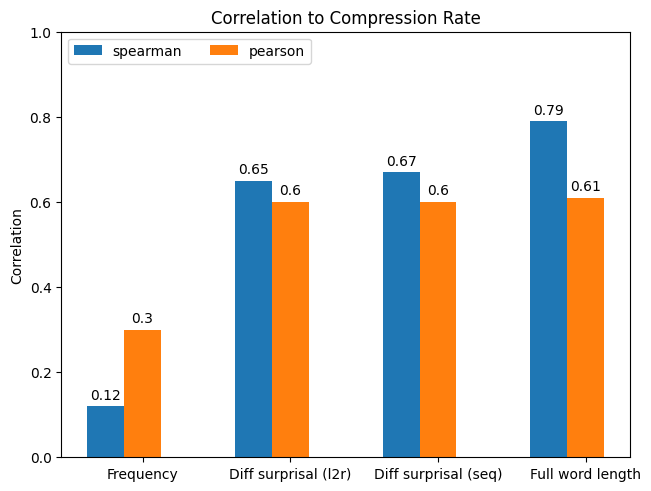

In [185]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[df['count_fl'] != 0]
drop_unknowns = drop_unknowns[drop_unknowns['count_abbr'] != 0]
corrs_all = {"spearman": [], "pearson": []}

for idx in range(4):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 1:
        df_drop_nan = drop_unknowns[drop_unknowns['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
    elif idx == 2:
        df_drop_nan = drop_unknowns[drop_unknowns['abbr_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
        X = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

    else:
        df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs_all["pearson"].append(corr_pearson.round(2))
    corrs_all["spearman"].append(corr_spearman.round(2))

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    elif idx == 2:
        print("surprisal mask all")
    else:
        print("word length")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson.round(2))
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman.round(2))

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

groups = ("Frequency", "Diff surprisal (l2r)", "Diff surprisal (seq)", "Full word length")


x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs_all.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

frequency
rsquared, mse:  0.08828272549183569 0.12532640716505103
pearson corr, pvaldlue:  0.11834785844397419 0.4730264583487215
surprisal sequential
rsquared, mse:  0.1108519222998835 0.057404073953948115
pearson corr, pvaldlue:  0.17812857861396766 0.40498375539228004
surprisal mask all
rsquared, mse:  0.11422323296343762 0.057295143414007405
pearson corr, pvaldlue:  0.2602074334655018 0.21945101002481615
word length
rsquared, mse:  0.5630157424830347 0.04024283464303738
pearson corr, pvaldlue:  0.8419467222736026 2.501699351083601e-07
{'spearman': [(0.12, 0.47), (0.18, 0.4), (0.26, 0.22), (0.84, 0.0)], 'pearson': [(0.3, 0.07), (0.33, 0.11), (0.34, 0.11), (0.75, 0.0)]}


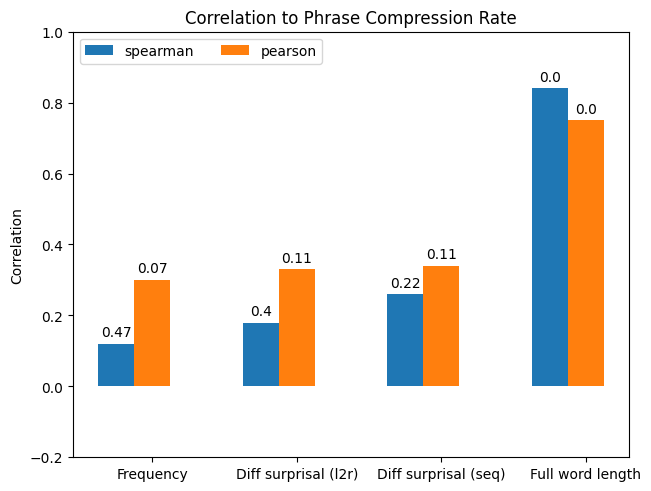

In [186]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_df.csv")
df = df[df['full_length'].str.contains(" ")]
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
df = df[df['count_fl'] != 0]
df = df[df['count_abbr'] != 0]
corrs_phrase = {"spearman": [], "pearson": []}
groups= []
for idx in range(4):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 1:
        df_drop_nan = df[df['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
    elif idx == 2:
        df_drop_nan = df[df['abbr_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
        X = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

    else:
        df_drop_nan = df[df['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs_phrase["pearson"].append((corr_pearson.round(2),  p_value_pearson.round(2)))
    corrs_phrase["spearman"].append((corr_spearman.round(2), p_value_spearman.round(2)))
    if idx == 0:
        group = "Frequency"
        print("frequency")
    elif idx == 1:
        group = "Diff surprisal (l2r)"

        print("surprisal sequential")
    elif idx == 2:
        group = "Diff surprisal (seq)"
        print("surprisal mask all")
    else:
        group = "Full word length"
        print("word length")
    groups.append(group)
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvaldlue: ", corr_spearman, p_value_spearman)

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np
print(corrs_phrase)

x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs_phrase.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [m[0] for m in measurement], width, label=attribute)
    ax.bar_label(rects, labels=[m[1] for m in measurement], padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Phrase Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.2, 1)

plt.show()

frequency
rsquared, mse:  0.001697118659404473 0.06082566008378046
pearson corr, pvalue:  -0.04119610005090882 0.8484271155062707
spearman corr, pvalue:  0.03864658667699022 0.8577113479879301
[[ -1.53118489]
 [-10.55965963]
 [  4.31528268]
 [ -2.98007238]
 [  5.13979088]
 [ -3.60106189]
 [ -2.53647443]
 [ -3.47387352]
 [ -3.12210874]
 [ -4.09951427]
 [ -1.9516568 ]
 [ -2.97301065]
 [ -1.46605384]
 [ -3.27334981]
 [  0.23706578]]
surprisal l2r
rsquared, mse:  0.21755732723007637 0.12834995315392592
pearson corr, pvalue:  0.4664304098470383 0.07966983180746987
spearman corr, pvalue:  0.32974477652733003 0.23004740683178804
[[ -1.53118489]
 [-10.55965963]
 [  4.31528268]
 [ -2.98007238]
 [  5.13979088]
 [ -3.60106189]
 [ -2.53647443]
 [ -3.47387352]
 [ -3.12210874]
 [ -4.09951427]
 [ -1.9516568 ]
 [ -2.97301065]
 [ -1.46605384]
 [ -3.27334981]
 [  0.23706578]]
surprisal mask all
rsquared, mse:  0.21755732723007637 0.12834995315392592
pearson corr, pvalue:  0.4664304098470383 0.0796698318

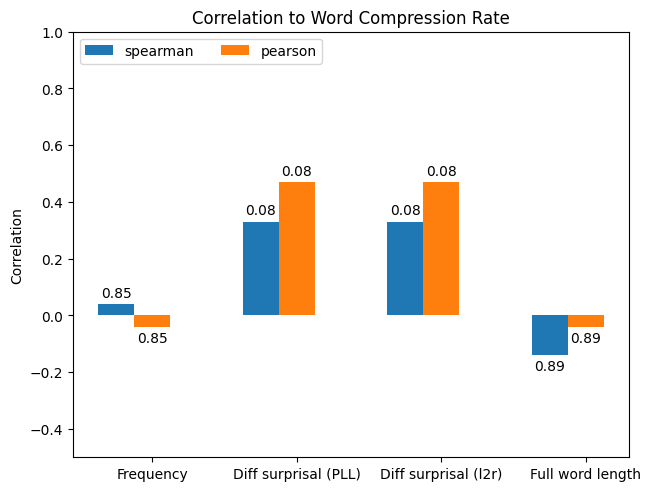

In [187]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_df.csv")
df = df[~df['full_length'].str.contains(" ")]
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[df['count_fl'] != 0]
drop_unknowns = drop_unknowns[drop_unknowns['count_abbr'] != 0]
corrs_word = {"spearman": [], "pearson": []}

for idx in range(4):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 2:
        df_drop_nan = drop_unknowns[drop_unknowns['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
        X = df_drop_nan[["surprisal_l2r"]].to_numpy()
        print(X)
    elif idx == 1: 
        df_drop_nan = drop_unknowns[drop_unknowns['fl_sequential_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_sequential_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
        print(X)
    else:
        df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs_word["pearson"].append((corr_pearson.round(2),  p_value_pearson.round(2)))
    corrs_word["spearman"].append((round(corr_spearman,2), p_value_pearson.round(2)))

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal l2r")
    elif idx == 2:
        print("surprisal mask all")
    else:
        print("word length")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)


import matplotlib.pyplot as plt
import numpy as np

groups = ("Frequency", "Diff surprisal (PLL)", "Diff surprisal (l2r)", "Full word length")


x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs_word.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [m[0] for m in measurement], width, label=attribute)
    ax.bar_label(rects, labels=[m[1] for m in measurement], padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Word Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.5, 1)

plt.show()

In [188]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

import scipy
df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"]
df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
X= df_drop_nan[["surprisal_mask_l2r", "surprisal_seq", "fl_len"]].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df_drop_nan["compression"].to_numpy()
weights = np.ones_like(y)

reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
r_squared = reg.score(X, y)

y_predict = reg.predict(X)
reg.coef_


    

array([ 0.08005362, -0.04262687,  0.04828565])

{'all': [(0.12, 0.0), (0.65, 0.0), (0.67, 0.0), (0.79, 0.0)], 'word': [(0.04, 0.85), (0.33, 0.08), (0.33, 0.08), (-0.14, 0.89)], 'phrase': [(0.12, 0.47), (0.18, 0.4), (0.26, 0.22), (0.84, 0.0)]}
(0.12, 0.0)
(0.65, 0.0)
(0.67, 0.0)
(0.79, 0.0)
(0.04, 0.85)
(0.33, 0.08)
(0.33, 0.08)
(-0.14, 0.89)
(0.12, 0.47)
(0.18, 0.4)
(0.26, 0.22)
(0.84, 0.0)


(-0.2, 1.0)

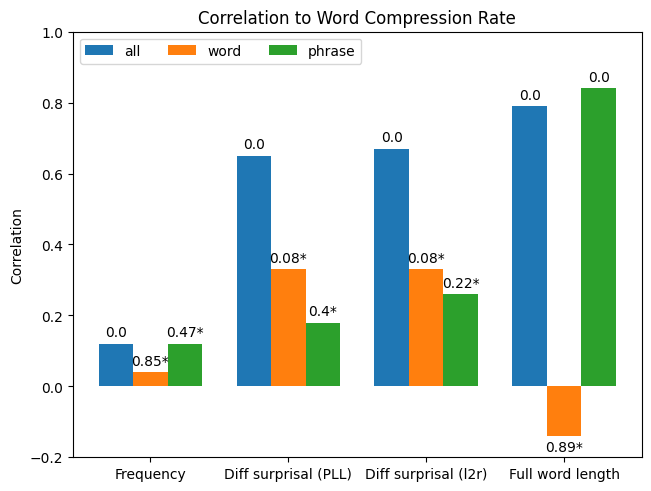

In [192]:
corrs_phrase1 =  corrs_phrase["spearman"]
corrs_word1 =  corrs_word["spearman"]
corrs_all1 = [(c, 0.0) for c in corrs_all["spearman"]]
corrs = {"all": corrs_all1, "word": corrs_word1, "phrase": corrs_phrase1}
print(corrs)
corrs

import matplotlib.pyplot as plt
import numpy as np

groups = ("Frequency", "Diff surprisal (PLL)", "Diff surprisal (l2r)", "Full word length")


x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [m[0] for m in measurement], width, label=attribute)
    labels = []
    for m in measurement:
        print(m)
        if m[1] > 0.05:
            labels.append(f"{m[1]}*")
        else:
            labels.append(m[1])
    ax.bar_label(rects, labels=labels,padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Word Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.2, 1)
